In [6]:
import numpy as np
from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

# Define the distance matrix and labels
distance_matrix = np.array([
    [0.0, 2.3, 4.3, 8.5, 5.7, 9.7, 6.0, 7.7, 11.9, 8.3],
    [2.3, 0.0, 5.0, 6.2, 3.4, 7.4, 6.7, 5.8, 9.6, 6.0],
    [4.3, 5.0, 0.0, 7.6, 4.8, 8.8, 4.7, 6.8, 11.0, 7.4],
    [8.5, 6.2, 7.6, 0.0, 2.8, 1.2, 8.1, 7.2, 4.8, 7.4],
    [5.7, 3.4, 4.8, 2.8, 0.0, 4.0, 5.9, 5.0, 6.2, 5.2],
    [9.7, 7.4, 8.8, 1.2, 4.0, 0.0, 8.3, 7.4, 5.0, 7.6],
    [6.0, 6.7, 4.7, 8.1, 5.9, 8.3, 0.0, 2.1, 6.3, 2.7],
    [7.7, 5.8, 6.8, 7.2, 5.0, 7.4, 2.1, 0.0, 4.2, 0.6],
    [11.9, 9.6, 11.0, 4.8, 6.2, 5.0, 6.3, 4.2, 0.0, 3.6],
    [8.3, 6.0, 7.4, 7.4, 5.2, 7.6, 2.7, 0.6, 3.6, 0.0]
])

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

condensed_dist = ssd.squareform(distance_matrix)

# Perform hierarchical clustering using single linkage
Z = linkage(condensed_dist, method='single')

# Initialize clusters with individual labels
clusters = [[label] for label in labels]

# Print each merge step
print("Merge steps:")
for step in range(Z.shape[0]):
    cluster_idx1 = int(Z[step, 0])
    cluster_idx2 = int(Z[step, 1])
    distance = Z[step, 2]
    
    # Get the clusters to merge
    cluster1 = clusters[cluster_idx1]
    cluster2 = clusters[cluster_idx2]
    
    # Format clusters for printing
    merged1 = ', '.join(sorted(cluster1))
    merged2 = ', '.join(sorted(cluster2))
    
    print(f"Step {step+1}: merged clusters: {{{merged1}}} and {{{merged2}}}, distance: {distance:.2f}")
    
    # Merge clusters and add to the list
    clusters.append(cluster1 + cluster2)

Merge steps:
Step 1: merged clusters: {H} and {J}, distance: 0.60
Step 2: merged clusters: {D} and {F}, distance: 1.20
Step 3: merged clusters: {G} and {H, J}, distance: 2.10
Step 4: merged clusters: {A} and {B}, distance: 2.30
Step 5: merged clusters: {E} and {D, F}, distance: 2.80
Step 6: merged clusters: {A, B} and {D, E, F}, distance: 3.40
Step 7: merged clusters: {I} and {G, H, J}, distance: 3.60
Step 8: merged clusters: {C} and {A, B, D, E, F}, distance: 4.30
Step 9: merged clusters: {G, H, I, J} and {A, B, C, D, E, F}, distance: 4.70


In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import re
from sklearn.metrics import jaccard_score

# Question 1
stations = np.array([
    [0.3, 2.3], [1.1, 3.8], [2.9, 0.6], [3.5, 7.6], [3.2, 5.1],
    [4.0, 8.3], [6.1, 2.1], [6.7, 3.6], [7.6, 6.9], [7.1, 3.8]
])

# 1a) Euclidean Distance Matrix
# Formula: Given two points p = (p1, p2) and q = (q1, q2), the Euclidean distance d(p, q) = sqrt((q1 - p1)^2 + (q2 - p2)^2)
euclidean_dist = squareform(pdist(stations, metric='euclidean'))
print("Formula used: d(p, q) = square root of ((q1 - p1)^2 + (q2 - p2)^2)")
print("Euclidean Distance Matrix:")
stations_labels = list('ABCDEFGHIJ')
df_euclidean = pd.DataFrame(euclidean_dist, columns=stations_labels, index=stations_labels)
print(df_euclidean.round(2))


Formula used: d(p, q) = square root of ((q1 - p1)^2 + (q2 - p2)^2)
Euclidean Distance Matrix:
      A     B     C     D     E     F     G     H     I     J
A  0.00  1.70  3.11  6.19  4.03  7.05  5.80  6.53  8.63  6.96
B  1.70  0.00  3.67  4.49  2.47  5.35  5.28  5.60  7.20  6.00
C  3.11  3.67  0.00  7.03  4.51  7.78  3.53  4.84  7.86  5.28
D  6.19  4.49  7.03  0.00  2.52  0.86  6.08  5.12  4.16  5.23
E  4.03  2.47  4.51  2.52  0.00  3.30  4.17  3.81  4.75  4.11
F  7.05  5.35  7.78  0.86  3.30  0.00  6.55  5.42  3.86  5.46
G  5.80  5.28  3.53  6.08  4.17  6.55  0.00  1.62  5.03  1.97
H  6.53  5.60  4.84  5.12  3.81  5.42  1.62  0.00  3.42  0.45
I  8.63  7.20  7.86  4.16  4.75  3.86  5.03  3.42  0.00  3.14
J  6.96  6.00  5.28  5.23  4.11  5.46  1.97  0.45  3.14  0.00


In [11]:
manhattan_dist = squareform(pdist(stations, metric='cityblock'))
print("\nManhattan Distance Matrix:")
df_manhattan = pd.DataFrame(manhattan_dist, columns=stations_labels, index=stations_labels)
print(df_manhattan.round(2))
print("Formula used: d(p, q) = absolute value of (q1 - p1) + absolute value of (q2 - p2)")


Manhattan Distance Matrix:
      A    B     C    D    E    F    G    H     I    J
A   0.0  2.3   4.3  8.5  5.7  9.7  6.0  7.7  11.9  8.3
B   2.3  0.0   5.0  6.2  3.4  7.4  6.7  5.8   9.6  6.0
C   4.3  5.0   0.0  7.6  4.8  8.8  4.7  6.8  11.0  7.4
D   8.5  6.2   7.6  0.0  2.8  1.2  8.1  7.2   4.8  7.4
E   5.7  3.4   4.8  2.8  0.0  4.0  5.9  5.0   6.2  5.2
F   9.7  7.4   8.8  1.2  4.0  0.0  8.3  7.4   5.0  7.6
G   6.0  6.7   4.7  8.1  5.9  8.3  0.0  2.1   6.3  2.7
H   7.7  5.8   6.8  7.2  5.0  7.4  2.1  0.0   4.2  0.6
I  11.9  9.6  11.0  4.8  6.2  5.0  6.3  4.2   0.0  3.6
J   8.3  6.0   7.4  7.4  5.2  7.6  2.7  0.6   3.6  0.0
Formula used: d(p, q) = absolute value of (q1 - p1) + absolute value of (q2 - p2)



Detailed steps of hierarchical clustering (single - linkage) using Euclidean distance:
Step 1:
  Merged clusters: (7, 9)
  Distance between them: 0.45
  New cluster formed: [7, 9]
Step 2:
  Merged clusters: (3, 5)
  Distance between them: 0.86
  New cluster formed: [3, 5]
Step 3:
  Merged clusters: (4, 6)
  Distance between them: 1.62
  New cluster formed: [6, 7, 9]
Step 4:
  Merged clusters: (0, 1)
  Distance between them: 1.70
  New cluster formed: [0, 1]
Step 5:
  Merged clusters: (1, 5)
  Distance between them: 2.47
  New cluster formed: [4, 0, 1]
Step 6:
  Merged clusters: (2, 4)
  Distance between them: 2.52
  New cluster formed: [3, 5, 4, 0, 1]
Step 7:
  Merged clusters: (0, 3)
  Distance between them: 3.11
  New cluster formed: [2, 3, 5, 4, 0, 1]
Step 8:
  Merged clusters: (0, 1)
  Distance between them: 3.14
  New cluster formed: [8, 6, 7, 9]
Step 9:
  Merged clusters: (0, 1)
  Distance between them: 3.53
  New cluster formed: [2, 3, 5, 4, 0, 1, 8, 6, 7, 9]

Detailed steps of

C:\Users\fsm\AppData\Local\Temp\ipykernel_33672\3783905731.py:56: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_euclidean = linkage(euclidean_dist, method='single')
C:\Users\fsm\AppData\Local\Temp\ipykernel_33672\3783905731.py:57: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_manhattan = linkage(manhattan_dist, method='single')


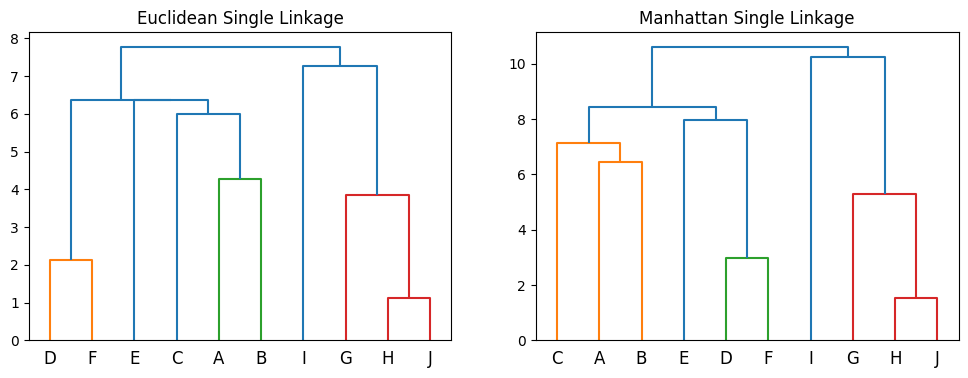

Formula used for single - linkage clustering: d(Ci, Cj) = minimum distance between any point p in Ci and any point q in Cj


In [15]:
def hierarchical_clustering_steps(distance_matrix):
    clusters = [[i] for i in range(len(stations))]
    steps = []

    while len(clusters) > 1:
        min_distance = np.inf
        merge_indices = None
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = clusters[i]
                cluster_j = clusters[j]
                cluster_distances = []
                for idx_i in cluster_i:
                    for idx_j in cluster_j:
                        cluster_distances.append(distance_matrix[idx_i, idx_j])
                single_linkage_distance = min(cluster_distances)
                if single_linkage_distance < min_distance:
                    min_distance = single_linkage_distance
                    merge_indices = (i, j)

        i, j = merge_indices
        new_cluster = clusters[i] + clusters[j]
        del clusters[j]
        del clusters[i]
        clusters.append(new_cluster)

        step_info = {
            "merged_clusters": (merge_indices[0], merge_indices[1]),
            "distance": min_distance,
            "new_cluster": new_cluster
        }
        steps.append(step_info)

    return steps


# Euclidean clustering steps
euclidean_steps = hierarchical_clustering_steps(euclidean_dist)
print("\nDetailed steps of hierarchical clustering (single - linkage) using Euclidean distance:")
for idx, step in enumerate(euclidean_steps):
    print(f"Step {idx + 1}:")
    print(f"  Merged clusters: {step['merged_clusters']}")
    print(f"  Distance between them: {step['distance']:.2f}")
    print(f"  New cluster formed: {step['new_cluster']}")

# Manhattan clustering steps
manhattan_steps = hierarchical_clustering_steps(manhattan_dist)
print("\nDetailed steps of hierarchical clustering (single - linkage) using Manhattan distance:")
for idx, step in enumerate(manhattan_steps):
    print(f"Step {idx + 1}:")
    print(f"  Merged clusters: {step['merged_clusters']}")
    print(f"  Distance between them: {step['distance']:.2f}")
    print(f"  New cluster formed: {step['new_cluster']}")


Z_euclidean = linkage(euclidean_dist, method='single')
Z_manhattan = linkage(manhattan_dist, method='single')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
dendrogram(Z_euclidean, labels=stations_labels)
plt.title('Euclidean Single Linkage')
plt.subplot(1, 2, 2)
dendrogram(Z_manhattan, labels=stations_labels)
plt.title('Manhattan Single Linkage')
plt.show()
print("Formula used for single - linkage clustering: d(Ci, Cj) = minimum distance between any point p in Ci and any point q in Cj")

In [16]:
# Question 2
transactions = [
    {'A', 'B', 'C'}, {'E', 'D', 'A'}, {'A', 'E'},
    {'B', 'C'}, {'A', 'B', 'E'}, {'C', 'B', 'D'}
]

# 2a) Frequent Itemsets (Apriori Algorithm)
# Formula: Support of an itemset X is Support(X) = (Number of transactions containing X) / (Total number of transactions)
df = pd.get_dummies(pd.DataFrame(transactions)).fillna(0)
frequent_itemsets = apriori(df, min_support=2/6, use_colnames=True)
print("\nFrequent Itemsets:")
for index, row in frequent_itemsets.iterrows():
    items = ', '.join(row['itemsets'])
    support = row['support']
    print(f"Items: {items}, Support: {support:.2f}")
print("Formula used for support: Support(X) = (Number of transactions containing X) / (Total number of transactions)")


Frequent Itemsets:
Items: 0_B, Support: 0.50
Items: 0_D, Support: 0.33
Items: 1_A, Support: 0.50
Items: 1_C, Support: 0.33
Items: 2_E, Support: 0.33
Items: 0_B, 1_A, Support: 0.33
Items: 1_A, 2_E, Support: 0.33
Formula used for support: Support(X) = (Number of transactions containing X) / (Total number of transactions)


In [19]:
from itertools import combinations

def get_frequent_itemsets(transactions, min_support):
    # Step 1: Generate single itemsets and count their support
    print("Step 1: Count support for single itemsets")
    itemsets = {}
    for transaction in transactions:
        for item in transaction:
            if item in itemsets:
                itemsets[item] += 1
            else:
                itemsets[item] = 1

    print("Single itemset counts:", itemsets)

    # Step 2: Filter single itemsets based on min_support
    frequent_itemsets = {item: count for item, count in itemsets.items() if count >= min_support}
    print("Frequent single itemsets (min support = {}): {}".format(min_support, frequent_itemsets))

    # List to hold all frequent itemsets
    all_frequent_itemsets = [set([item]) for item in frequent_itemsets.keys()]
    
    k = 2  # Start with pairs
    while True:
        # Step 3: Generate candidate itemsets of size k
        print("\nStep 3: Generate candidate itemsets of size {}".format(k))
        candidates = set()
        for combo in combinations(frequent_itemsets.keys(), k):
            candidates.add(tuple(sorted(combo)))
        
        print("Candidate itemsets of size {}: {}".format(k, candidates))

        # Step 4: Count support for candidates
        candidate_counts = {candidate: 0 for candidate in candidates}
        for transaction in transactions:
            transaction_set = set(transaction)
            for candidate in candidates:
                if set(candidate).issubset(transaction_set):
                    candidate_counts[candidate] += 1

        print("Candidate counts:", candidate_counts)

        # Step 5: Filter candidates based on min_support
        frequent_candidates = {candidate: count for candidate, count in candidate_counts.items() if count >= min_support}
        print("Frequent candidate itemsets (min support = {}): {}".format(min_support, frequent_candidates))

        if not frequent_candidates:
            break  # No more frequent itemsets found

        # Add frequent itemsets of size k to the list
        all_frequent_itemsets.extend([set(candidate) for candidate in frequent_candidates.keys()])
        
        # Update frequent_itemsets for the next iteration
        frequent_itemsets = {item: count for item, count in frequent_candidates.items()}
        k += 1

    return all_frequent_itemsets

# Example transactions
transactions = [
    ['A', 'B', 'C'],
    ['E', 'D', 'A'],
    ['A', 'E'],
    ['B', 'C'],
    ['A', 'B', 'E'],
    ['C', 'B', 'D']
]

# Set minimum support
min_support = 2

# Get frequent itemsets
frequent_itemsets = get_frequent_itemsets(transactions, min_support)

# Output the results
print("\nFrequent Itemsets (min support = {}):".format(min_support))
for itemset in frequent_itemsets:
    print(itemset)

Step 1: Count support for single itemsets
Single itemset counts: {'A': 4, 'B': 4, 'C': 3, 'E': 3, 'D': 2}
Frequent single itemsets (min support = 2): {'A': 4, 'B': 4, 'C': 3, 'E': 3, 'D': 2}

Step 3: Generate candidate itemsets of size 2
Candidate itemsets of size 2: {('A', 'E'), ('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('B', 'D'), ('D', 'E'), ('A', 'C'), ('B', 'E'), ('A', 'D')}
Candidate counts: {('A', 'E'): 3, ('A', 'B'): 2, ('B', 'C'): 3, ('C', 'D'): 1, ('C', 'E'): 0, ('B', 'D'): 1, ('D', 'E'): 1, ('A', 'C'): 1, ('B', 'E'): 1, ('A', 'D'): 1}
Frequent candidate itemsets (min support = 2): {('A', 'E'): 3, ('A', 'B'): 2, ('B', 'C'): 3}

Step 3: Generate candidate itemsets of size 3
Candidate itemsets of size 3: {(('A', 'B'), ('A', 'E'), ('B', 'C'))}
Candidate counts: {(('A', 'B'), ('A', 'E'), ('B', 'C')): 0}
Frequent candidate itemsets (min support = 2): {}

Frequent Itemsets (min support = 2):
{'A'}
{'B'}
{'C'}
{'E'}
{'D'}
{'A', 'E'}
{'B', 'A'}
{'B', 'C'}


In [20]:
# 2b) Association Rules
# Confidence formula: Given a rule X -> Y, Confidence(X -> Y) = Support(X U Y) / Support(X)
# Lift formula: Lift(X -> Y) = Support(X U Y) / (Support(X) * Support(Y))
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[rules['support'] >= 0.3]
print("\nAssociation Rules:")
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"Rule: {antecedent} -> {consequent}, Support: {support:.2f}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")
print("Formula used for confidence: Confidence(X -> Y) = Support of (X union Y) / Support of X")
print("Formula used for lift: Lift(X -> Y) = Support of (X union Y) / (Support of X * Support of Y)")

AttributeError: 'list' object has no attribute 'shape'

In [27]:
from itertools import combinations

def calculate_support(transactions, itemset):
    count = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return count / len(transactions)

def generate_frequent_itemsets(transactions, min_support):
    itemsets = {}
    
    # Step 1: Generate single itemsets
    for transaction in transactions:
        for item in transaction:
            if item in itemsets:
                itemsets[item] += 1
            else:
                itemsets[item] = 1

    # Step 2: Filter single itemsets based on min_support
    frequent_itemsets = {item: count for item, count in itemsets.items() if count >= min_support}
    all_frequent_itemsets = [frozenset([item]) for item in frequent_itemsets.keys()]
    
    print("\nSingle Itemsets and their Support:")
    for item, count in frequent_itemsets.items():
        print(f"Item: {item}, Support: {count / len(transactions):.2f}")

    k = 2  # Start with pairs
    while True:
        candidates = set()
        for combo in combinations(frequent_itemsets.keys(), k):
            candidates.add(frozenset(combo))

        candidate_counts = {candidate: 0 for candidate in candidates}
        for transaction in transactions:
            transaction_set = set(transaction)
            for candidate in candidates:
                if candidate.issubset(transaction_set):
                    candidate_counts[candidate] += 1

        frequent_candidates = {candidate: count for candidate, count in candidate_counts.items() if count >= min_support}
        
        if not frequent_candidates:
            break

        all_frequent_itemsets.extend(frequent_candidates.keys())
        frequent_itemsets = {item: count for item, count in frequent_candidates.items()}
        k += 1

    return all_frequent_itemsets

def generate_rules(frequent_itemsets, transactions, min_support, min_confidence):
    rules = []
    total_transactions = len(transactions)

    print("\nGenerating Association Rules:")
    
    for itemset in frequent_itemsets:
        print(f"\nExamining itemset: {set(itemset)}")
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent
                
                if len(consequent) == 0:
                    continue
                
                support_itemset = calculate_support(transactions, itemset)
                support_antecedent = calculate_support(transactions, antecedent)
                
                confidence = support_itemset / support_antecedent if support_antecedent > 0 else 0
                
                print(f"  Antecedent: {antecedent}, Consequent: {consequent}")
                print(f"  Support(A ∪ B): {support_itemset:.2f}, Support(A): {support_antecedent:.2f}, Confidence: {confidence:.2f}")

                if support_itemset >= min_support and confidence >= min_confidence:
                    rules.append((antecedent, consequent, support_itemset, confidence))
                    print(f"  Rule passed: {antecedent} -> {consequent}, Support: {support_itemset:.2f}, Confidence: {confidence:.2f}")

    return rules

# Example transactions
transactions = [
    ['A', 'B', 'C'],
    ['E', 'D', 'A'],
    ['A', 'E'],
    ['B', 'C'],
    ['A', 'B', 'E'],
    ['C', 'B', 'D']
]

# Minimum support (30% of 6 transactions = 2)
min_support = 2 / len(transactions)  # 30%
# Minimum confidence
min_confidence = 0.6

# Step 1: Generate frequent itemsets
frequent_itemsets = generate_frequent_itemsets(transactions, min_support)

# Step 2: Generate rules
rules = generate_rules(frequent_itemsets, transactions, min_support, min_confidence)

# Output summary
print("\nSummary of Association Rules (min support = {}, min confidence = {}):".format(min_support, min_confidence))
if not rules:
    print("No rules found that meet the thresholds.")
else:
    print("Found {} rules:".format(len(rules)))
    for antecedent, consequent, support, confidence in rules:
        print("Rule: {} -> {}, Support: {:.2f}, Confidence: {:.2f}".format(
            set(antecedent), set(consequent), support, confidence))


Single Itemsets and their Support:
Item: A, Support: 0.67
Item: B, Support: 0.67
Item: C, Support: 0.50
Item: E, Support: 0.50
Item: D, Support: 0.33

Generating Association Rules:

Examining itemset: {'A'}

Examining itemset: {'B'}

Examining itemset: {'C'}

Examining itemset: {'E'}

Examining itemset: {'D'}

Examining itemset: {'D', 'B'}
  Antecedent: frozenset({'D'}), Consequent: frozenset({'B'})
  Support(A ∪ B): 0.17, Support(A): 0.33, Confidence: 0.50
  Antecedent: frozenset({'B'}), Consequent: frozenset({'D'})
  Support(A ∪ B): 0.17, Support(A): 0.67, Confidence: 0.25

Examining itemset: {'A', 'E'}
  Antecedent: frozenset({'A'}), Consequent: frozenset({'E'})
  Support(A ∪ B): 0.50, Support(A): 0.67, Confidence: 0.75
  Rule passed: frozenset({'A'}) -> frozenset({'E'}), Support: 0.50, Confidence: 0.75
  Antecedent: frozenset({'E'}), Consequent: frozenset({'A'})
  Support(A ∪ B): 0.50, Support(A): 0.50, Confidence: 1.00
  Rule passed: frozenset({'E'}) -> frozenset({'A'}), Support:

In [24]:
# 2c) Interest Calculation
# Formula: Given a rule X -> Y, Interest(X -> Y) = Support(X U Y) / Support(Y)
def calculate_interest(rule, transactions):
    antecedent = set(rule['antecedents'])
    consequent = set(rule['consequents'])
    support_rule = rule['support']
    support_consequent = len([t for t in transactions if consequent.issubset(t)]) / len(transactions)
    return support_rule / support_consequent

rules['interest'] = rules.apply(lambda row: calculate_interest(row, transactions), axis=1)
print("\nInterest Values:")
for index, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    interest = row['interest']
    print(f"Rule: {antecedent} -> {consequent}, Interest: {interest:.2f}")
print("Formula used for interest: Interest(X -> Y) = Support of (X union Y) / Support of Y")

AttributeError: 'list' object has no attribute 'apply'

In [30]:
from itertools import combinations

def calculate_support(transactions, itemset):
    count = sum(1 for transaction in transactions if set(itemset).issubset(transaction))
    return count / len(transactions)

def generate_frequent_itemsets(transactions, min_support):
    itemsets = {}
    
    # Step 1: Generate single itemsets
    for transaction in transactions:
        for item in transaction:
            if item in itemsets:
                itemsets[item] += 1
            else:
                itemsets[item] = 1

    # Step 2: Filter single itemsets based on min_support
    frequent_itemsets = {item: count for item, count in itemsets.items() if count >= min_support}
    all_frequent_itemsets = [frozenset([item]) for item in frequent_itemsets.keys()]
    
    print("\nSingle Itemsets and their Support:")
    for item, count in frequent_itemsets.items():
        print(f"Item: {item}, Support: {count / len(transactions):.2f}")

    k = 2  # Start with pairs
    while True:
        candidates = set()
        for combo in combinations(frequent_itemsets.keys(), k):
            candidates.add(frozenset(combo))

        candidate_counts = {candidate: 0 for candidate in candidates}
        for transaction in transactions:
            transaction_set = set(transaction)
            for candidate in candidates:
                if candidate.issubset(transaction_set):
                    candidate_counts[candidate] += 1

        frequent_candidates = {candidate: count for candidate, count in candidate_counts.items() if count >= min_support}
        
        if not frequent_candidates:
            break

        all_frequent_itemsets.extend(frequent_candidates.keys())
        frequent_itemsets = {item: count for item, count in frequent_candidates.items()}
        k += 1

    return all_frequent_itemsets

def generate_rules(frequent_itemsets, transactions, min_support, min_confidence):
    rules = []
    total_transactions = len(transactions)

    print("\nGenerating Association Rules:")
    
    for itemset in frequent_itemsets:
        print(f"\nExamining itemset: {set(itemset)}")
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent
                
                if len(consequent) == 0:
                    continue
                
                support_itemset = calculate_support(transactions, itemset)
                support_antecedent = calculate_support(transactions, antecedent)
                
                confidence = support_itemset / support_antecedent if support_antecedent > 0 else 0
                
                print(f"  Antecedent: {antecedent}, Consequent: {consequent}")
                print(f"  Support(A ∪ B): {support_itemset:.2f}, Support(A): {support_antecedent:.2f}, Confidence: {confidence:.2f}")

                if support_itemset >= min_support and confidence >= min_confidence:
                    rules.append((antecedent, consequent, support_itemset, confidence))
                    print(f"  Rule passed: {antecedent} -> {consequent}, Support: {support_itemset:.2f}, Confidence: {confidence:.2f}")

    return rules

def calculate_interest(rules, transactions):
    print("\nStep 3: Calculate Interest for Each Rule")
    interests = []
    for antecedent, consequent, support_itemset, confidence in rules:
        support_antecedent = calculate_support(transactions, antecedent)
        support_consequent = calculate_support(transactions, consequent)
        
        # Calculate expected support
        expected_support = support_antecedent * support_consequent
        interest = support_itemset - expected_support
        
        interests.append((antecedent, consequent, interest))
        print(f"Rule: {antecedent} -> {consequent}, Interest: {interest:.2f}")

    return interests

# Example transactions
transactions = [
    ['A', 'B', 'C'],
    ['E', 'D', 'A'],
    ['A', 'E'],
    ['B', 'C'],
    ['A', 'B', 'E'],
    ['C', 'B', 'D']
]

# Minimum support (30% of 6 transactions = 2)
min_support = 2 / len(transactions)  # 30%
# Minimum confidence
min_confidence = 0.6

# Step 1: Generate frequent itemsets
frequent_itemsets = generate_frequent_itemsets(transactions, min_support)

# Step 2: Generate rules
rules = generate_rules(frequent_itemsets, transactions, min_support, min_confidence)

# Step 3: Calculate interest for the generated rules
interests = calculate_interest(rules, transactions)

# Final Output of Interests
print("\nFinal Interests of the Rules:")
if not interests:
    print("No interests calculated for the rules.")
else:
    for antecedent, consequent, interest in interests:
        print(f"Rule: {antecedent} -> {consequent}, Interest: {interest:.2f}")


Single Itemsets and their Support:
Item: A, Support: 0.67
Item: B, Support: 0.67
Item: C, Support: 0.50
Item: E, Support: 0.50
Item: D, Support: 0.33

Generating Association Rules:

Examining itemset: {'A'}

Examining itemset: {'B'}

Examining itemset: {'C'}

Examining itemset: {'E'}

Examining itemset: {'D'}

Examining itemset: {'D', 'B'}
  Antecedent: frozenset({'D'}), Consequent: frozenset({'B'})
  Support(A ∪ B): 0.17, Support(A): 0.33, Confidence: 0.50
  Antecedent: frozenset({'B'}), Consequent: frozenset({'D'})
  Support(A ∪ B): 0.17, Support(A): 0.67, Confidence: 0.25

Examining itemset: {'A', 'E'}
  Antecedent: frozenset({'A'}), Consequent: frozenset({'E'})
  Support(A ∪ B): 0.50, Support(A): 0.67, Confidence: 0.75
  Rule passed: frozenset({'A'}) -> frozenset({'E'}), Support: 0.50, Confidence: 0.75
  Antecedent: frozenset({'E'}), Consequent: frozenset({'A'})
  Support(A ∪ B): 0.50, Support(A): 0.50, Confidence: 1.00
  Rule passed: frozenset({'E'}) -> frozenset({'A'}), Support:

In [31]:
# Question 3
def get_shingles(text, n=3):
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    return [tuple(words[i:i + n]) for i in range(len(words) - n + 1)]

docs = [
    "The cat sits on the mat and looks very calm",
    "The cat sits calmly on the mat while the dog plays nearby",
    "On the grass the dog plays joyfully as the cat watches quietly"
]
# 3a) 3 - Shingles
# Shingles are contiguous subsequences of length n in a document
for i, doc in enumerate(docs, 1):
    shingles = get_shingles(doc)
    print(f"\nDocument {i} Shingles:")
    for shingle in shingles:
        print(f"Shingle: {' '.join(shingle)}")
print("A shingle is a contiguous subsequence of length n in a document.")

# 3b) Jaccard Similarity
# Formula: Given two sets A and B, J(A, B) = (Size of (A intersection B)) / (Size of (A union B))
all_shingles = set()
for doc in docs:
    all_shingles.update(get_shingles(doc))
all_shingles = list(all_shingles)
matrix = []
for doc in docs:
    shingles = set(get_shingles(doc))
    row = [1 if s in shingles else 0 for s in all_shingles]
    matrix.append(row)
similarities = []
for i in range(3):
    for j in range(i + 1, 3):
        sim = jaccard_score(matrix[i], matrix[j])
        similarities.append((i + 1, j + 1, sim))
print("\nJaccard Similarities:")
sim_matrix = np.zeros((3, 3))
for i, j, sim in similarities:
    sim_matrix[i - 1, j - 1] = sim
    sim_matrix[j - 1, i - 1] = sim
df_sim = pd.DataFrame(sim_matrix, columns=['Doc1', 'Doc2', 'Doc3'], index=['Doc1', 'Doc2', 'Doc3'])
print(df_sim.round(2))
print("Formula used for Jaccard similarity: J(A, B) = (Size of the intersection of A and B) / (Size of the union of A and B)")

# 3c) Minhashing
# Min - hash value of a column C for a permutation pi is the minimum value of pi(r) for all r in C where r = 1
input_matrix = np.array([
    [1, 0, 1, 0],
    [0, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 0, 0, 0],
    [0, 1, 0, 1]
])
permutations = [
    [4, 3, 5, 2],
    [2, 7, 1, 5],
    [6, 1, 4, 3],
    [1, 5, 6, 7]
]
signature = np.zeros((4, 4), dtype=int)
for i in range(4):
    perm = permutations[i]
    for col in range(4):
        min_hash = np.inf
        for row in range(7):
            if input_matrix[row, col] == 1:
                if perm[row] < min_hash:
                    min_hash = perm[row]
        signature[i, col] = min_hash
print("\nSignature Matrix:")
df_signature = pd.DataFrame(signature, columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3', 'Row4'])
print(df_signature)
print("Formula used for min - hashing: Min - hash value of a column C for a permutation pi = minimum of pi(r) for all r in C where r = 1")


Document 1 Shingles:
Shingle: the cat sits
Shingle: cat sits on
Shingle: sits on the
Shingle: on the mat
Shingle: the mat and
Shingle: mat and looks
Shingle: and looks very
Shingle: looks very calm

Document 2 Shingles:
Shingle: the cat sits
Shingle: cat sits calmly
Shingle: sits calmly on
Shingle: calmly on the
Shingle: on the mat
Shingle: the mat while
Shingle: mat while the
Shingle: while the dog
Shingle: the dog plays
Shingle: dog plays nearby

Document 3 Shingles:
Shingle: on the grass
Shingle: the grass the
Shingle: grass the dog
Shingle: the dog plays
Shingle: dog plays joyfully
Shingle: plays joyfully as
Shingle: joyfully as the
Shingle: as the cat
Shingle: the cat watches
Shingle: cat watches quietly
A shingle is a contiguous subsequence of length n in a document.

Jaccard Similarities:
      Doc1  Doc2  Doc3
Doc1  0.00  0.12  0.00
Doc2  0.12  0.00  0.05
Doc3  0.00  0.05  0.00
Formula used for Jaccard similarity: J(A, B) = (Size of the intersection of A and B) / (Size of the 

IndexError: list index out of range

In [33]:
import string

# Function to normalize text by removing punctuation and converting to lowercase
def normalize_text(text):
    # Remove punctuation and convert to lowercase
    translator = str.maketrans('', '', string.punctuation)
    normalized_text = text.translate(translator).lower()
    return normalized_text

# Function to generate 3-shingles (three consecutive words) from normalized text
def generate_shingles(text, k=3):
    words = text.split()
    shingles = set()
    for i in range(len(words) - k + 1):
        shingle = ' '.join(words[i:i + k])
        shingles.add(shingle)
    return shingles

# Documents
documents = {
    "Document 1": "The cat sits on the mat and looks very calm.",
    "Document 2": "The cat sits calmly on the mat, while the dog plays nearby.",
    "Document 3": "On the grass, the dog plays joyfully as the cat watches quietly."
}

# Process each document
shingle_results = {}
for doc_name, content in documents.items():
    print(f"Processing {doc_name}...")
    
    # Step 1: Normalize the text
    normalized_content = normalize_text(content)
    print(f"Normalized Text: '{normalized_content}'")
    
    # Step 2: Generate 3-shingles
    shingles = generate_shingles(normalized_content, k=3)
    shingle_results[doc_name] = shingles
    
    # Step 3: Print the shingles
    print(f"3-Shingles: {shingles}\n")

# Final results
print("Final 3-Shingle Results:")
for doc_name, shingles in shingle_results.items():
    print(f"{doc_name}: {shingles}")

Processing Document 1...
Normalized Text: 'the cat sits on the mat and looks very calm'
3-Shingles: {'mat and looks', 'on the mat', 'the mat and', 'and looks very', 'sits on the', 'the cat sits', 'looks very calm', 'cat sits on'}

Processing Document 2...
Normalized Text: 'the cat sits calmly on the mat while the dog plays nearby'
3-Shingles: {'dog plays nearby', 'on the mat', 'sits calmly on', 'the dog plays', 'calmly on the', 'the cat sits', 'while the dog', 'mat while the', 'cat sits calmly', 'the mat while'}

Processing Document 3...
Normalized Text: 'on the grass the dog plays joyfully as the cat watches quietly'
3-Shingles: {'the cat watches', 'the grass the', 'on the grass', 'cat watches quietly', 'plays joyfully as', 'dog plays joyfully', 'grass the dog', 'as the cat', 'joyfully as the', 'the dog plays'}

Final 3-Shingle Results:
Document 1: {'mat and looks', 'on the mat', 'the mat and', 'and looks very', 'sits on the', 'the cat sits', 'looks very calm', 'cat sits on'}
Document

In [35]:
import string

# Function to normalize text by removing punctuation and converting to lowercase
def normalize_text(text):
    translator = str.maketrans('', '', string.punctuation)
    normalized_text = text.translate(translator).lower()
    return normalized_text

# Function to generate 3-shingles (three consecutive words) from normalized text
def generate_shingles(text, k=3):
    words = text.split()
    shingles = set()
    for i in range(len(words) - k + 1):
        shingle = ' '.join(words[i:i + k])
        shingles.add(shingle)
    return shingles

# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Documents
documents = {
    "Document 1": "The cat sits on the mat and looks very calm.",
    "Document 2": "The cat sits calmly on the mat, while the dog plays nearby.",
    "Document 3": "On the grass, the dog plays joyfully as the cat watches quietly."
}

# Step 1: Generate 3-shingles for each document
shingle_results = {}
for doc_name, content in documents.items():
    normalized_content = normalize_text(content)
    shingles = generate_shingles(normalized_content, k=3)
    shingle_results[doc_name] = shingles

# Step 2: Create a set of all unique shingles
all_shingles = set()
for shingles in shingle_results.values():
    all_shingles.update(shingles)

print("Unique Shingles Across All Documents:")
print(all_shingles)

# Step 3: Construct the shingle matrix
shingle_matrix = {shingle: [0] * len(documents) for shingle in all_shingles}
doc_index = {doc_name: idx for idx, doc_name in enumerate(documents.keys())}

for doc_name, shingles in shingle_results.items():
    for shingle in shingles:
        shingle_matrix[shingle][doc_index[doc_name]] = 1

# Display the shingle matrix
print("\nShingle Matrix (Rows: Shingles, Columns: Documents):")
for shingle, row in shingle_matrix.items():
    print(f"{shingle}: {row}")

# Step 4: Calculate Jaccard similarity for each pair of documents
doc_names = list(documents.keys())
num_docs = len(doc_names)
jaccard_matrix = [[0] * num_docs for _ in range(num_docs)]

print("\nJaccard Similarity Matrix:")
for i in range(num_docs):
    for j in range(i + 1, num_docs):
        sim = jaccard_similarity(shingle_results[doc_names[i]], shingle_results[doc_names[j]])
        jaccard_matrix[i][j] = sim
        jaccard_matrix[j][i] = sim  # Symmetric matrix
        print(f"Similarity between {doc_names[i]} and {doc_names[j]}: {sim:.4f}")

# Display the final Jaccard similarity matrix
print("\nFinal Jaccard Similarity Matrix:")
for row in jaccard_matrix:
    print(row)

Unique Shingles Across All Documents:
{'cat watches quietly', 'on the mat', 'the mat and', 'and looks very', 'sits on the', 'dog plays joyfully', 'calmly on the', 'looks very calm', 'grass the dog', 'joyfully as the', 'cat sits on', 'mat while the', 'the dog plays', 'the mat while', 'dog plays nearby', 'mat and looks', 'the cat watches', 'the grass the', 'on the grass', 'sits calmly on', 'the cat sits', 'as the cat', 'while the dog', 'cat sits calmly', 'plays joyfully as'}

Shingle Matrix (Rows: Shingles, Columns: Documents):
cat watches quietly: [0, 0, 1]
on the mat: [1, 1, 0]
the mat and: [1, 0, 0]
and looks very: [1, 0, 0]
sits on the: [1, 0, 0]
dog plays joyfully: [0, 0, 1]
calmly on the: [0, 1, 0]
looks very calm: [1, 0, 0]
grass the dog: [0, 0, 1]
joyfully as the: [0, 0, 1]
cat sits on: [1, 0, 0]
mat while the: [0, 1, 0]
the dog plays: [0, 1, 1]
the mat while: [0, 1, 0]
dog plays nearby: [0, 1, 0]
mat and looks: [1, 0, 0]
the cat watches: [0, 0, 1]
the grass the: [0, 0, 1]
on the

In [37]:
import numpy as np

# 各文档的shingles（假设已生成）
doc1_shingles = {'the cat sits', 'cat sits on', 'sits on the', 'on the mat', 'the mat and', 'mat and looks', 'and looks very', 'looks very calm'}
doc2_shingles = {'the cat sits', 'cat sits calmly', 'sits calmly on', 'calmly on the', 'on the mat', 'the mat while', 'mat while the', 'while the dog', 'the dog plays', 'dog plays nearby'}
doc3_shingles = {'on the grass', 'the grass the', 'grass the dog', 'the dog plays', 'dog plays joyfully', 'plays joyfully as', 'joyfully as the', 'as the cat', 'the cat watches', 'cat watches quietly'}

# 合并所有唯一shingles并排序
all_shingles = sorted(doc1_shingles | doc2_shingles | doc3_shingles)

# 初始化矩阵M（行：shingles，列：文档）
M = np.zeros((len(all_shingles), 3), dtype=int)

# 填充矩阵
for i, shingle in enumerate(all_shingles):
    M[i][0] = 1 if shingle in doc1_shingles else 0
    M[i][1] = 1 if shingle in doc2_shingles else 0
    M[i][2] = 1 if shingle in doc3_shingles else 0

# 打印矩阵
print("3-Shingle Matrix M:")
print("Rows (Shingles):", all_shingles)
print("Matrix:\n", M)
def jaccard_similarity(col1, col2):
    intersection = np.dot(col1, col2)
    union = np.sum(col1) + np.sum(col2) - intersection
    return intersection / union if union != 0 else 0

# 计算所有文档对的相似度
pairs = [(0, 1), (0, 2), (1, 2)]
results = {}
for pair in pairs:
    doc_a, doc_b = pair
    sim = jaccard_similarity(M[:, doc_a], M[:, doc_b])
    results[f"Doc{doc_a+1} & Doc{doc_b+1}"] = sim

# 打印结果
print("\nJaccard Similarities:")
for pair, sim in results.items():
    print(f"{pair}: {sim:.3f}")

3-Shingle Matrix M:
Rows (Shingles): ['and looks very', 'as the cat', 'calmly on the', 'cat sits calmly', 'cat sits on', 'cat watches quietly', 'dog plays joyfully', 'dog plays nearby', 'grass the dog', 'joyfully as the', 'looks very calm', 'mat and looks', 'mat while the', 'on the grass', 'on the mat', 'plays joyfully as', 'sits calmly on', 'sits on the', 'the cat sits', 'the cat watches', 'the dog plays', 'the grass the', 'the mat and', 'the mat while', 'while the dog']
Matrix:
 [[1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]]

Jaccard Similarities:
Doc1 & Doc2: 0.125
Doc1 & Doc3: 0.000
Doc2 & Doc3: 0.053


In [39]:
import numpy as np


# Define the get_shingles function
def get_shingles(text, n=3):
    text = text.lower().replace(",", "").replace(".", "")
    words = text.split()
    return [tuple(words[i:i + n]) for i in range(len(words) - n + 1)]


# Define docs
docs = [
    "The cat sits on the mat and looks very calm",
    "The cat sits calmly on the mat while the dog plays nearby",
    "On the grass the dog plays joyfully as the cat watches quietly"
]

# Calculate Jaccard similarities
all_shingles = set()
for doc in docs:
    all_shingles.update(get_shingles(doc))
all_shingles = list(all_shingles)

matrix = []
for doc in docs:
    shingles = set(get_shingles(doc))
    row = [1 if s in shingles else 0 for s in all_shingles]
    matrix.append(row)


def custom_jaccard_score(set1, set2):
    intersection = sum([1 for i in range(len(set1)) if set1[i] == 1 and set2[i] == 1])
    union = sum([1 for i in range(len(set1)) if set1[i] == 1 or set2[i] == 1])
    if union == 0:
        return 0
    return intersection / union


similarities = []
for i in range(3):
    for j in range(i + 1, 3):
        sim = custom_jaccard_score(matrix[i], matrix[j])
        similarities.append((i + 1, j + 1, sim))

print("\nJaccard Similarities:")
for pair in similarities:
    print(f"Doc {pair[0]} vs Doc {pair[1]}: {pair[2]:.2f}")

# Input matrix
input_matrix = np.array([
    [1, 0, 1, 0],
    [0, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 1]
])

# Random permutations
permutations = [
    [4, 3, 5, 2],
    [2, 7, 1, 5],
    [6, 1, 4, 3],
    [1, 5, 6, 7],
    [5, 2, 2, 1],
    [3, 6, 7, 4],
    [7, 4, 3, 6]
]

# Compute signature matrix
signature = np.zeros((4, 4), dtype=int)
for i in range(4):
    perm = permutations[i]
    for col in range(4):
        min_hash = np.inf
        for row in range(7):
            if input_matrix[row, col] == 1:
                if perm[row] < min_hash:
                    min_hash = perm[row]
        signature[i, col] = min_hash

print("\nSignature Matrix:")
print(signature)


Jaccard Similarities:
Doc 1 vs Doc 2: 0.12
Doc 1 vs Doc 3: 0.00
Doc 2 vs Doc 3: 0.05


IndexError: list index out of range

In [40]:
import numpy as np

# Step 1: Define the input matrix
input_matrix = np.array([
    [1, 0, 1, 0],
    [0, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 1]
])

# Step 2: Random permutations provided
permutations = [
    [4, 3, 5, 2],
    [2, 7, 1, 5],
    [6, 1, 4, 3],
    [1, 5, 6, 7],
    [5, 2, 2, 1],
    [3, 6, 7, 4],
    [7, 4, 3, 6]
]

# Step 3: Calculate Jaccard similarity for the input matrix
def jaccard_similarity(matrix):
    num_items = matrix.shape[0]
    similarity_matrix = np.zeros((num_items, num_items))
    
    for i in range(num_items):
        for j in range(i + 1, num_items):
            # Calculate intersection and union
            intersection = np.sum(np.logical_and(matrix[i], matrix[j]))
            union = np.sum(np.logical_or(matrix[i], matrix[j]))
            similarity = intersection / union if union > 0 else 0
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric
            
    return similarity_matrix

# Calculate Jaccard similarity for the input matrix
input_jaccard_matrix = jaccard_similarity(input_matrix)
print("Jaccard Similarity Matrix for Input Matrix:")
print(input_jaccard_matrix)

# Step 4: Apply Minhashing using the provided permutations
def minhashing(matrix, permutations):
    num_items = matrix.shape[0]
    num_permutations = len(permutations)
    signature_matrix = np.full((num_permutations, num_items), np.inf)
    
    for perm_index in range(num_permutations):
        perm = permutations[perm_index]
        for item_index in range(num_items):
            for feature_index in perm:  # Use the permutation directly
                if matrix[item_index, feature_index - 1] == 1:  # Adjust for 0-based indexing
                    signature_matrix[perm_index, item_index] = min(signature_matrix[perm_index, item_index], feature_index)
                    break  # Stop after the first 1 is found
    
    return signature_matrix

# Generate the signature matrix
signature_matrix = minhashing(input_matrix, permutations)

print("\nSignature Matrix from Minhashing:")
print(signature_matrix)

# Step 5: Calculate Jaccard similarity from the signature matrix
def signature_jaccard_similarity(signature_matrix):
    num_items = signature_matrix.shape[1]
    similarity_matrix = np.zeros((num_items, num_items))
    
    for i in range(num_items):
        for j in range(i + 1, num_items):
            # Calculate intersection and union of signatures
            intersection = np.sum(signature_matrix[:, i] == signature_matrix[:, j])
            union = signature_matrix.shape[0]  # Total number of permutations
            similarity = intersection / union
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric
            
    return similarity_matrix

# Calculate Jaccard similarity from the signature matrix
signature_jaccard_matrix = signature_jaccard_similarity(signature_matrix)
print("\nJaccard Similarity Matrix from Signature Matrix:")
print(signature_jaccard_matrix)

# Step 6: Compare the Jaccard similarities
print("\nComparison of Jaccard Similarities:")
for i in range(input_jaccard_matrix.shape[0]):
    for j in range(i + 1, input_jaccard_matrix.shape[1]):
        print(f"Document {i + 1} & Document {j + 1} - Input: {input_jaccard_matrix[i, j]:.4f}, Signature: {signature_jaccard_matrix[i, j]:.4f}")

# Conclusion on Minhashing
print("\nConclusion:")
print("Minhashing provides an approximation of Jaccard similarity. The effectiveness of Minhashing depends on the number of permutations used. More permutations generally yield better approximations.")

Jaccard Similarity Matrix for Input Matrix:
[[0.         0.33333333 0.25       0.         0.66666667 0.5
  0.        ]
 [0.33333333 0.         0.25       0.         0.66666667 0.
  0.33333333]
 [0.25       0.25       0.         0.33333333 0.5        0.33333333
  0.66666667]
 [0.         0.         0.33333333 0.         0.         0.
  0.5       ]
 [0.66666667 0.66666667 0.5        0.         0.         0.33333333
  0.25      ]
 [0.5        0.         0.33333333 0.         0.33333333 0.
  0.        ]
 [0.         0.33333333 0.66666667 0.5        0.25       0.
  0.        ]]


IndexError: index 4 is out of bounds for axis 1 with size 4

In [42]:
import numpy as np
from itertools import combinations

# 输入矩阵定义
input_matrix = np.array([
    [1, 0, 1, 0],
    [0, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 1]
])

# 修正排列函数（处理无效行号并补全）
def fix_permutation(perm, n_rows=7):
    valid = [min(p-1, n_rows-1) if p > n_rows else p for p in perm] # 处理无效行号
    all_rows = set(range(n_rows))
    remaining = sorted(all_rows - set(valid))
    return valid + remaining

# 原始Jaccard计算
def original_jaccard(matrix):
    cols = matrix.shape[1]
    results = {}
    for (i,j) in combinations(range(cols), 2):
        intersect = np.sum(np.logical_and(matrix[:,i], matrix[:,j]))
        union = np.sum(np.logical_or(matrix[:,i], matrix[:,j]))
        results[(i,j)] = intersect / union if union !=0 else 0
    return results

# MinHash签名生成
def generate_signatures(matrix, permutations):
    n_cols = matrix.shape[1]
    sig_matrix = np.zeros((len(permutations), n_cols), dtype=int)
    
    for p_idx, perm in enumerate(permutations):
        fixed_perm = fix_permutation(perm)
        for col in range(n_cols):
            for row in fixed_perm:
                if matrix[row, col] == 1:
                    sig_matrix[p_idx, col] = row
                    break
    return sig_matrix

# 签名相似度计算
def signature_similarity(sig_matrix):
    n_cols = sig_matrix.shape[1]
    results = {}
    for (i,j) in combinations(range(n_cols), 2):
        matches = np.sum(sig_matrix[:,i] == sig_matrix[:,j])
        results[(i,j)] = matches / sig_matrix.shape[0]
    return results

# 主程序
if __name__ == "__main__":
    permutations = np.array([
        [4, 3, 5, 2],
        [2, 7, 1, 5],
        [6, 1, 4, 3],
        [1, 5, 6, 7],
        [5, 2, 2, 1],
        [3, 6, 7, 4],
        [7, 4, 3, 6]
    ])

    # 计算原始相似度
    original_sim = original_jaccard(input_matrix)
    
    # 生成签名矩阵
    sig_matrix = generate_signatures(input_matrix, permutations)
    
    # 计算签名相似度
    signature_sim = signature_similarity(sig_matrix)

    # 结果输出
    print("原始Jaccard相似度:")
    for pair, sim in original_sim.items():
        print(f"列{pair[0]}-列{pair[1]}: {sim:.2f}")

    print("\nMinhash估计相似度:")
    for pair, sim in signature_sim.items():
        print(f"列{pair[0]}-列{pair[1]}: {sim:.2f}")

    # 签名矩阵打印
    print("\n生成的签名矩阵:")
    print("哈希函数 | 列0 列1 列2 列3")
    print("---------------------------")
    for i, row in enumerate(sig_matrix):
        print(f"   {i+1}    |", "  ".join(map(str, row)))

IndexError: index 7 is out of bounds for axis 0 with size 7

In [45]:
import numpy as np
from tabulate import tabulate

# Input matrix (7 items, 4 features)
input_matrix = np.array([
    [1, 0, 1, 0],
    [0, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 1]
])

# Random permutations (7 permutations, 4 elements each)
permutations = np.array([
    [4, 3, 5, 2],
    [2, 7, 1, 5],
    [6, 1, 4, 3],
    [1, 5, 6, 7],
    [5, 2, 2, 1],
    [3, 6, 7, 4],
    [7, 4, 3, 6]
])

# Calculate Jaccard similarity for input matrix
def jaccard_similarity(a, b):
    intersection = np.logical_and(a, b).sum()
    union = np.logical_or(a, b).sum()
    return intersection / union if union != 0 else 0.0

n_items = input_matrix.shape[0]
input_jaccard = np.zeros((n_items, n_items))
for i in range(n_items):
    for j in range(n_items):
        input_jaccard[i, j] = jaccard_similarity(input_matrix[i], input_matrix[j])

print("Input Matrix Jaccard Similarity:")
print(tabulate(input_jaccard, headers=[f"Item {i}" for i in range(n_items)], 
               floatfmt=".4f", tablefmt="grid"))

# MinHashing to create signature matrix
n_perm = permutations.shape[0]
signature_matrix = np.full((n_items, n_perm), np.inf)

for perm_idx in range(n_perm):
    perm = permutations[perm_idx]
    for item_idx in range(n_items):
        item_vector = input_matrix[item_idx]
        ones_indices = np.where(item_vector == 1)[0]
        if ones_indices.size > 0:
            min_hash = np.min(perm[ones_indices])
            signature_matrix[item_idx, perm_idx] = min_hash

print("\nSignature Matrix:")
print(tabulate(signature_matrix, headers=[f"Perm {i}" for i in range(n_perm)], 
               floatfmt=".0f", tablefmt="grid"))

# Calculate Jaccard similarity for signature matrix
signature_jaccard = np.zeros((n_items, n_items))
for i in range(n_items):
    for j in range(n_items):
        sig_i = signature_matrix[i]
        sig_j = signature_matrix[j]
        intersection = np.equal(sig_i, sig_j).sum()
        union = sig_i.shape[0]
        signature_jaccard[i, j] = intersection / union if union != 0 else 0.0

print("\nSignature Matrix Jaccard Similarity:")
print(tabulate(signature_jaccard, headers=[f"Item {i}" for i in range(n_items)], 
               floatfmt=".4f", tablefmt="grid"))

# Compare results
print("\nComparison:")
for i in range(n_items):
    for j in range(n_items):
        print(f"Item {i}-{j}: "
              f"Input Jaccard={input_jaccard[i,j]:.4f}, "
              f"Signature Jaccard={signature_jaccard[i,j]:.4f}")

# Conclusion
print("\nIs MinHashing a good approximation?")
if np.allclose(input_jaccard, signature_jaccard, atol=0.2):
    print("Yes, MinHashing is a good approximation in this case. "
          "MinHashing works because the probability that two minhashes are equal "
          "is mathematically proven to equal the Jaccard similarity of the original sets.")
else:
    print("No, MinHashing does not provide a good approximation here.")

Input Matrix Jaccard Similarity:
+----------+----------+----------+----------+----------+----------+----------+
|   Item 0 |   Item 1 |   Item 2 |   Item 3 |   Item 4 |   Item 5 |   Item 6 |
+==========+==========+==========+==========+==========+==========+==========+
|   1.0000 |   0.3333 |   0.2500 |   0.0000 |   0.6667 |   0.5000 |   0.0000 |
+----------+----------+----------+----------+----------+----------+----------+
|   0.3333 |   1.0000 |   0.2500 |   0.0000 |   0.6667 |   0.0000 |   0.3333 |
+----------+----------+----------+----------+----------+----------+----------+
|   0.2500 |   0.2500 |   1.0000 |   0.3333 |   0.5000 |   0.3333 |   0.6667 |
+----------+----------+----------+----------+----------+----------+----------+
|   0.0000 |   0.0000 |   0.3333 |   1.0000 |   0.0000 |   0.0000 |   0.5000 |
+----------+----------+----------+----------+----------+----------+----------+
|   0.6667 |   0.6667 |   0.5000 |   0.0000 |   1.0000 |   0.3333 |   0.2500 |
+----------+-------